# Generate Visualization from Experiment

In [24]:
import matplotlib.pyplot as plt
import json
import numpy as np

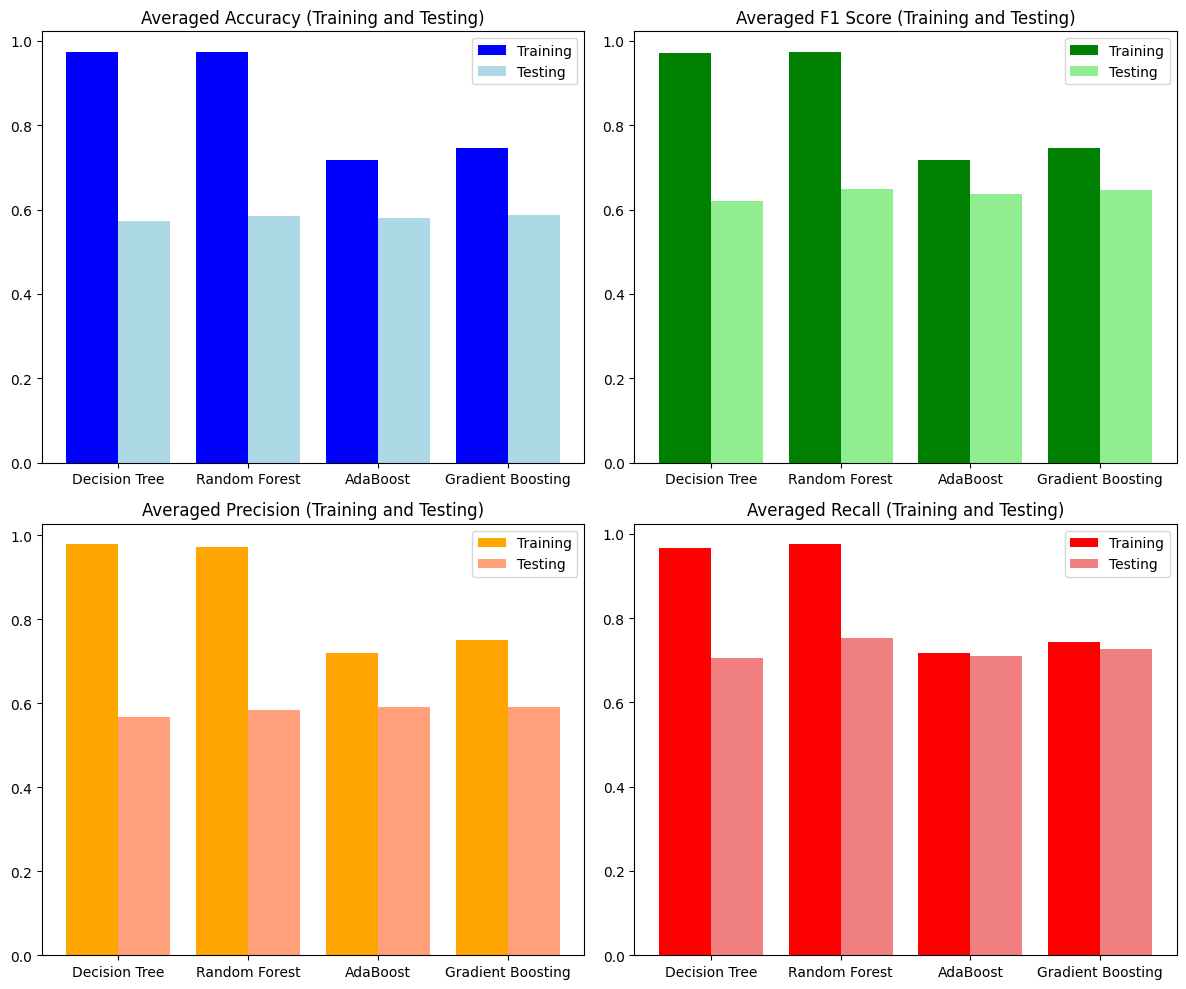

In [25]:
import json
import numpy as np
import matplotlib.pyplot as plt

with open('classifier_results_334.json', 'r') as json_file:
    data = json.load(json_file)

classifiers = list(data.keys())
task_ids = list(data[classifiers[0]].keys())

# Initialize arrays to store metric values
train_accuracy_scores = np.zeros((len(classifiers), len(task_ids)))
test_accuracy_scores = np.zeros((len(classifiers), len(task_ids)))
train_f1_scores = np.zeros((len(classifiers), len(task_ids)))
test_f1_scores = np.zeros((len(classifiers), len(task_ids)))
train_precision_scores = np.zeros((len(classifiers), len(task_ids)))
test_precision_scores = np.zeros((len(classifiers), len(task_ids)))
train_recall_scores = np.zeros((len(classifiers), len(task_ids)))
test_recall_scores = np.zeros((len(classifiers), len(task_ids)))

# Populate arrays with metric values
for i, clf in enumerate(classifiers):
    for j, task_id in enumerate(task_ids):
        train_accuracy_scores[i, j] = data[clf][task_id]['train_accuracy']
        test_accuracy_scores[i, j] = data[clf][task_id]['test_accuracy']
        train_f1_scores[i, j] = data[clf][task_id]['train_f1']
        test_f1_scores[i, j] = data[clf][task_id]['test_f1']
        train_precision_scores[i, j] = data[clf][task_id]['train_precision_macro']
        test_precision_scores[i, j] = data[clf][task_id]['test_precision_macro']
        train_recall_scores[i, j] = data[clf][task_id]['train_recall_macro']
        test_recall_scores[i, j] = data[clf][task_id]['test_recall_macro']

# Calculate average scores across tasks
avg_train_accuracy = np.mean(train_accuracy_scores, axis=1)
avg_test_accuracy = np.mean(test_accuracy_scores, axis=1)
avg_train_f1 = np.mean(train_f1_scores, axis=1)
avg_test_f1 = np.mean(test_f1_scores, axis=1)
avg_train_precision = np.mean(train_precision_scores, axis=1)
avg_test_precision = np.mean(test_precision_scores, axis=1)
avg_train_recall = np.mean(train_recall_scores, axis=1)
avg_test_recall = np.mean(test_recall_scores, axis=1)

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot training and testing accuracy side-by-side
axs[0, 0].bar(np.arange(len(classifiers)) - 0.2, avg_train_accuracy, width=0.4, color='blue', label='Training')
axs[0, 0].bar(np.arange(len(classifiers)) + 0.2, avg_test_accuracy, width=0.4, color='lightblue', label='Testing')
axs[0, 0].set_title('Averaged Accuracy (Training and Testing)')
axs[0, 0].set_xticks(np.arange(len(classifiers)))
axs[0, 0].set_xticklabels(classifiers)
axs[0, 0].legend()

# Plot training and testing f1_score side-by-side
axs[0, 1].bar(np.arange(len(classifiers)) - 0.2, avg_train_f1, width=0.4, color='green')
# Plot training and testing f1_score side-by-side
axs[0, 1].bar(np.arange(len(classifiers)) - 0.2, avg_train_f1, width=0.4, color='green', label='Training')
axs[0, 1].bar(np.arange(len(classifiers)) + 0.2, avg_test_f1, width=0.4, color='lightgreen', label='Testing')
axs[0, 1].set_title('Averaged F1 Score (Training and Testing)')
axs[0, 1].set_xticks(np.arange(len(classifiers)))
axs[0, 1].set_xticklabels(classifiers)
axs[0, 1].legend()

# Plot training and testing precision side-by-side
axs[1, 0].bar(np.arange(len(classifiers)) - 0.2, avg_train_precision, width=0.4, color='orange', label='Training')
axs[1, 0].bar(np.arange(len(classifiers)) + 0.2, avg_test_precision, width=0.4, color='lightsalmon', label='Testing')
axs[1, 0].set_title('Averaged Precision (Training and Testing)')
axs[1, 0].set_xticks(np.arange(len(classifiers)))
axs[1, 0].set_xticklabels(classifiers)
axs[1, 0].legend()

# Plot training and testing recall side-by-side
axs[1, 1].bar(np.arange(len(classifiers)) - 0.2, avg_train_recall, width=0.4, color='red', label='Training')
axs[1, 1].bar(np.arange(len(classifiers)) + 0.2, avg_test_recall, width=0.4, color='lightcoral', label='Testing')
axs[1, 1].set_title('Averaged Recall (Training and Testing)')
axs[1, 1].set_xticks(np.arange(len(classifiers)))
axs[1, 1].set_xticklabels(classifiers)
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

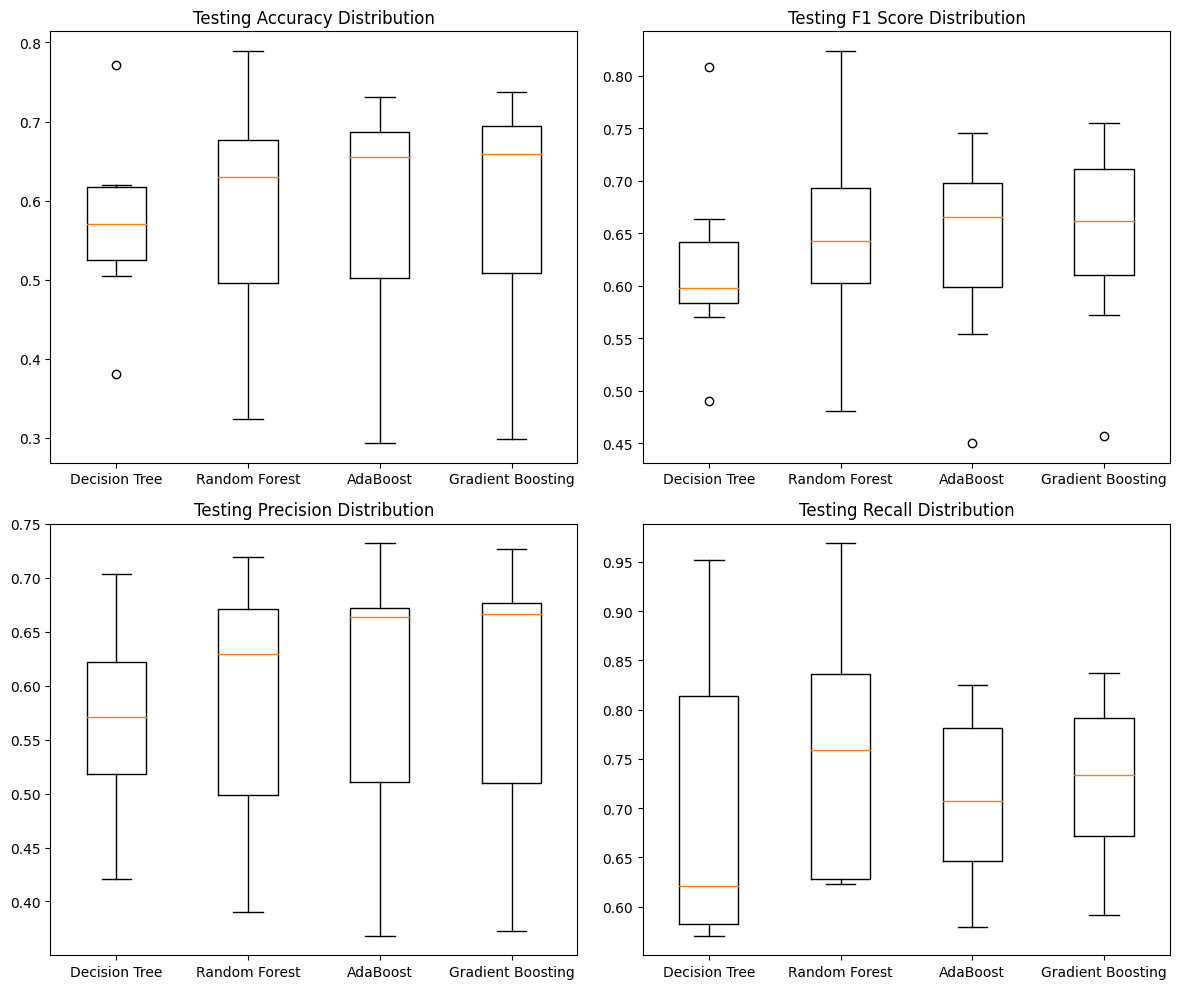

In [28]:
# Read the JSON file
with open('classifier_results_334.json', 'r') as json_file:
    data = json.load(json_file)

classifiers = list(data.keys())
task_ids = list(data[classifiers[0]].keys())

test_accuracy_scores = []
test_f1_scores = []
test_precision_scores = []
test_recall_scores = []

for clf in classifiers:
    test_accuracy_scores.append([data[clf][task_id]['test_accuracy'] for task_id in task_ids])
    test_f1_scores.append([data[clf][task_id]['test_f1'] for task_id in task_ids])
    test_precision_scores.append([data[clf][task_id]['test_precision_macro'] for task_id in task_ids])
    test_recall_scores.append([data[clf][task_id]['test_recall_macro'] for task_id in task_ids])

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].boxplot(test_accuracy_scores, labels=classifiers)
axs[0, 0].set_title('Testing Accuracy Distribution')

axs[0, 1].boxplot(test_f1_scores, labels=classifiers)
axs[0, 1].set_title('Testing F1 Score Distribution')

axs[1, 0].boxplot(test_precision_scores, labels=classifiers)
axs[1, 0].set_title('Testing Precision Distribution')

axs[1, 1].boxplot(test_recall_scores, labels=classifiers)
axs[1, 1].set_title('Testing Recall Distribution')

plt.tight_layout()
plt.show()

In [27]:
avg_test_f1

array([0.62119426, 0.64874547, 0.63658723, 0.64536244])